####  News Paper Sentiment Analysis
####  NTYTimes and Fox news have negative coorelation
####  BBC has an overall neutral bias
####  CBS has a strong positive bias

In [8]:
# Dependencies
import tweepy
import json
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key = "Ed4RNulN1lp7AbOooHa9STCoU"
consumer_secret = "P7cUJlmJZq0VaCY0Jg7COliwQqzK0qYEyUF9Y0idx4ujb3ZlW5"
access_token = "839621358724198402-dzdOsx2WWHrSuBwyNUiqSEnTivHozAZ"
access_token_secret = "dCZ80uNRbFDjxdU2EckmNiSckdoATach6Q8zb7YYYE5ER"

# Setup Tweepy API Authentication -2
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [39]:
news_outlets = ['nytimes', 'CNN', 'BBC','CBS', 'fox' ]
#news_outlets = ['nytimes' ]

#### Pull last 100 tweets from each outlet.
#### Perform a sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet. 
#### Pull into a DataFrame the tweet's source acount, its text, its date, and its compound, positive, neutral, and negative sentiment scores.
#### Export the data in the DataFrame into a CSV file.
#### Save PNG images for each plot.


In [12]:
# Array of news outlets
tweet_count = 100

news_sentiment_analysis = pd.DataFrame()

for target_outlet in news_outlets :
    news_media = []
    positive = []
    neutral = []
    negative = []
    compound = []
    create_date = []
    tweets_ago = []
    # Target User

    # Loop through 50 pages of 


    # Get all tweets from home feed
    #TODO Search for twitter handle and any tweets 1500 
    public_tweets = api.user_timeline(target_outlet, count=tweet_count)

    # Loop through all tweets
    #TODO Pull the text and put each tweet in its own list for the  twitter handle
    i = 0
    for tweet in public_tweets:
        #print(tweet)
        # Break tweet text into an array of lowercase words
        tweet_text = tweet["text"]
        #Sentiment Analysis
        positive.append(analyzer.polarity_scores(tweet_text)["pos"])
        neutral.append(analyzer.polarity_scores(tweet_text)["neu"])
        negative.append(analyzer.polarity_scores(tweet_text)["neg"])
        compound.append(analyzer.polarity_scores(tweet_text)["compound"])
        create_date.append(datetime.strptime(tweet["created_at"], "%a %b %d %H:%M:%S %z %Y")) 
        news_media.append(tweet['user']['screen_name'])
        tweets_ago.append(i)
        i=i-1               
 

    data = pd.DataFrame({"news_media": news_media,
                         "positive": positive,
                         "neutral": neutral,
                         "negative": negative,
                         "compound": compound,
                         "create_date": create_date,
                         "tweets_ago":tweets_ago
                       })
    news_sentiment_analysis = news_sentiment_analysis.append(data)  

news_sentiment_analysis.set_index('news_media', 'create_date')
news_sentiment_analysis.to_csv("./output/news_media_sentiment_analysis.csv")

In [20]:
tweets_ago=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='nytimes']['tweets_ago']
tweet_compound=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='nytimes']['compound']
print(tweets_ago.values)

[  0  -1  -2  -3  -4  -5  -6  -7  -8  -9 -10 -11 -12 -13 -14 -15 -16 -17
 -18 -19 -20 -21 -22 -23 -24 -25 -26 -27 -28 -29 -30 -31 -32 -33 -34 -35
 -36 -37 -38 -39 -40 -41 -42 -43 -44 -45 -46 -47 -48 -49 -50 -51 -52 -53
 -54 -55 -56 -57 -58 -59 -60 -61 -62 -63 -64 -65 -66 -67 -68 -69 -70 -71
 -72 -73 -74 -75 -76 -77 -78 -79 -80 -81 -82 -83 -84 -85 -86 -87 -88 -89
 -90 -91 -92 -93 -94 -95 -96 -97 -98 -99]


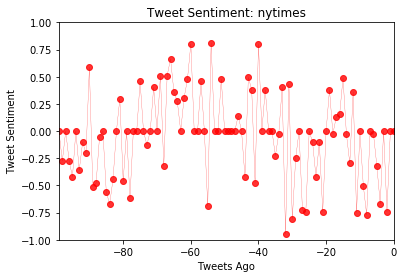

In [25]:
# Plot Time Between Twets

# Plot Time Between Twets
plt.plot(tweets_ago, tweet_compound, marker="o", 
               linewidth=0.25, alpha=0.8, color="r")

plt.xlim(np.min(tweets_ago),np.max(tweets_ago)) 
plt.ylim([-1,1])
#plt.ylim(np.min(tweet_compound),np.max(tweet_compound)) 

plt.ylabel("Tweet Sentiment")
plt.xlabel("Tweets Ago")
plt.title("Tweet Sentiment: %s" % 'nytimes')
plt.savefig("./output/nytimes.png")
plt.show()

In [26]:
tweets_ago=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='CNN']['tweets_ago']
compound=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='CNN']['compound']


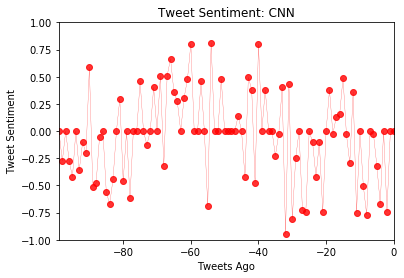

In [27]:
# Plot Time Between Twets

# Plot Time Between Twets
plt.plot(tweets_ago, tweet_compound, marker="o", 
               linewidth=0.25, alpha=0.8, color="r")

plt.xlim(np.min(tweets_ago),np.max(tweets_ago)) 
plt.ylim([-1,1])
#plt.ylim(np.min(tweet_compound),np.max(tweet_compound)) 

plt.ylabel("Tweet Sentiment")
plt.xlabel("Tweets Ago")
plt.title("Tweet Sentiment: %s" % 'CNN')
plt.savefig("./output/CNN.png")
plt.show()

In [28]:
tweets_ago=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='BBC']['tweets_ago']
tweet_compound=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='BBC']['compound']
print(tweets_ago.values)

[  0  -1  -2  -3  -4  -5  -6  -7  -8  -9 -10 -11 -12 -13 -14 -15 -16 -17
 -18 -19 -20 -21 -22 -23 -24 -25 -26 -27 -28 -29 -30 -31 -32 -33 -34 -35
 -36 -37 -38 -39 -40 -41 -42 -43 -44 -45 -46 -47 -48 -49 -50 -51 -52 -53
 -54 -55 -56 -57 -58 -59 -60 -61 -62 -63 -64 -65 -66 -67 -68 -69 -70 -71
 -72 -73 -74 -75 -76 -77 -78 -79 -80 -81 -82 -83 -84 -85 -86 -87 -88 -89
 -90 -91 -92 -93 -94 -95 -96 -97 -98 -99]


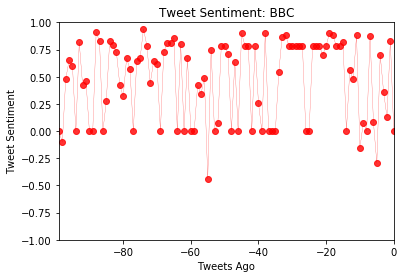

In [32]:
# Plot Time Between Twets

# Plot Time Between Twets
plt.plot(tweets_ago, tweet_compound, marker="o", 
               linewidth=0.25, alpha=0.8, color="r")

plt.xlim(np.min(tweets_ago),np.max(tweets_ago)) 
plt.ylim([-1,1])
#plt.ylim(np.min(tweet_compound),np.max(tweet_compound)) 

plt.ylabel("Tweet Sentiment")
plt.xlabel("Tweets Ago")
plt.title("Tweet Sentiment: %s" % 'BBC')
plt.savefig("./output/BBC.png")
plt.show()

In [33]:
tweets_ago=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='CBS']['tweets_ago']
tweet_compound=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='CBS']['compound']
print(tweets_ago.values)

[  0  -1  -2  -3  -4  -5  -6  -7  -8  -9 -10 -11 -12 -13 -14 -15 -16 -17
 -18 -19 -20 -21 -22 -23 -24 -25 -26 -27 -28 -29 -30 -31 -32 -33 -34 -35
 -36 -37 -38 -39 -40 -41 -42 -43 -44 -45 -46 -47 -48 -49 -50 -51 -52 -53
 -54 -55 -56 -57 -58 -59 -60 -61 -62 -63 -64 -65 -66 -67 -68 -69 -70 -71
 -72 -73 -74 -75 -76 -77 -78 -79 -80 -81 -82 -83 -84 -85 -86 -87 -88 -89
 -90 -91 -92 -93 -94 -95 -96 -97 -98 -99]


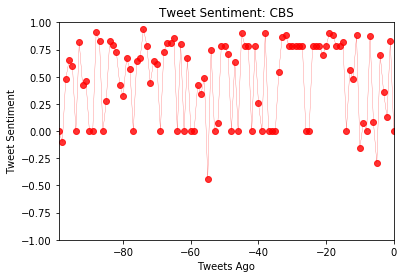

In [34]:
# Plot Time Between Twets

# Plot Time Between Twets
plt.plot(tweets_ago, tweet_compound, marker="o", 
               linewidth=0.25, alpha=0.8, color="r")

plt.xlim(np.min(tweets_ago),np.max(tweets_ago)) 
plt.ylim([-1,1])
#plt.ylim(np.min(tweet_compound),np.max(tweet_compound)) 

plt.ylabel("Tweet Sentiment")
plt.xlabel("Tweets Ago")
plt.title("Tweet Sentiment: %s" % 'CBS')
plt.savefig("./output/CBS.png")
plt.show()

In [35]:
tweets_ago=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='fox']['tweets_ago']
tweet_compound=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='fox']['compound']
print(tweets_ago.values)

[  0  -1  -2  -3  -4  -5  -6  -7  -8  -9 -10 -11 -12 -13 -14 -15 -16 -17
 -18 -19 -20 -21 -22 -23 -24 -25 -26 -27 -28 -29 -30 -31 -32 -33 -34 -35
 -36 -37 -38 -39 -40 -41 -42 -43 -44 -45 -46 -47 -48 -49 -50 -51 -52 -53
 -54 -55 -56 -57 -58 -59 -60 -61 -62 -63 -64 -65 -66 -67 -68 -69 -70 -71
 -72 -73 -74 -75 -76 -77 -78 -79 -80 -81 -82 -83 -84 -85 -86 -87 -88 -89
 -90 -91 -92 -93 -94 -95 -96 -97 -98 -99]


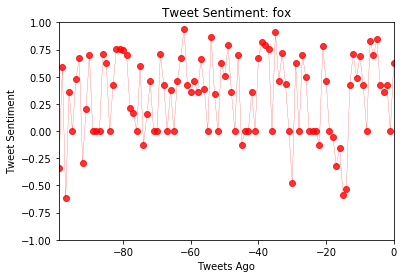

In [36]:
# Plot Time Between Twets

# Plot Time Between Twets
plt.plot(tweets_ago, tweet_compound, marker="o", 
               linewidth=0.25, alpha=0.8, color="r")

plt.xlim(np.min(tweets_ago),np.max(tweets_ago)) 
plt.ylim([-1,1])
#plt.ylim(np.min(tweet_compound),np.max(tweet_compound)) 

plt.ylabel("Tweet Sentiment")
plt.xlabel("Tweets Ago")
plt.title("Tweet Sentiment: %s" % 'fox')
plt.savefig("./output/fox.png")
plt.show()

In [51]:
# The second plot will be a bar plot visualizing the _overall_ sentiments 
overall_sent = []
for target_outlet in news_outlets:
    print(target_outlet)
    tweet_compound=news_sentiment_analysis.loc[news_sentiment_analysis.news_media==target_outlet]['compound']
    overall_sent.append(np.mean(tweet_compound))
overall_sent

nytimes
CNN
BBC
CBS
fox


[-0.047409,
 0.011413999999999988,
 0.12176400000000002,
 0.4676639999999999,
 0.3186979999999999]

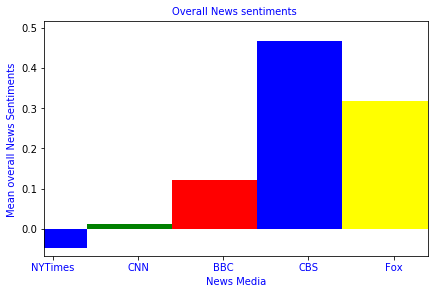

In [58]:
x_axis = [0,1,2,3,4]

plt.bar(0, overall_sent[0], facecolor='blue', alpha=1.0, align="center",width=1.0)
plt.bar(1, overall_sent[1], facecolor='green', alpha=1.0, align="center",width=1.0)
plt.bar(2, overall_sent[2], facecolor='red', alpha=1.0, align="center",width=1.0)
plt.bar(3, overall_sent[3], facecolor='blue', alpha=1.0, align="center",width=1.0)
plt.bar(4, overall_sent[4], facecolor='yellow', alpha=1.0, align="center",width=1.0)

tick_locations = [value+0.1 for value in x_axis]
plt.xticks(tick_locations, ["NYTimes","CNN","BBC", "CBS", "Fox"], fontsize=10, color='blue')

plt.xlim(0, 4.5)
plt.ylim(min(overall_sent)-0.02, max(overall_sent)+0.05)

plt.title("Overall News sentiments ", fontsize=10, color='blue')
plt.xlabel("News Media", fontsize=10, color='blue')
plt.ylabel("Mean overall News Sentiments ", fontsize=10, color='blue')
plt.tight_layout(pad=0.4, w_pad=0.01, h_pad=1.0)
plt.savefig("./output/moods_bar.png")
plt.show()